# Oil vs Banks Stock Price during recession.

In [1]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Imports for offline interactive plotting.

In [4]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting.

In [5]:
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
rbc = pd.read_csv('RBC.csv', index_col = 'Date') # Royal Bank of Canada.
cibc = pd.read_csv('CIBC.csv', index_col = 'Date') # Canadian Imperial Bank of Commerce.
bmo = pd.read_csv('BMO.csv', index_col = 'Date') # Bank of Montreal.
suncor = pd.read_csv('Suncor.csv', index_col = 'Date') # Suncor Energy Inc.
encana = pd.read_csv('Encana.csv', index_col = 'Date') # Encana Corp.
cnq = pd.read_csv('CNQ.csv', index_col = 'Date') # Canadian Natural Resource Ltd.
uso = pd.read_csv('USO.csv', index_col = 'Date') # United States Oil Fund LP (ETP).
wti = pd.read_csv('WTI.csv', index_col = 'Date')# WTI  Oil Price.

In [7]:
rbc.head()

Open   High    Low  Close  Volume
Date                                          
2006-01-03  38.90  39.75  38.83  39.59  346000
2006-01-04  39.74  40.36  39.69  40.34  382200
2006-01-05  39.90  39.90  39.40  39.48  261200
2006-01-06  39.50  39.59  39.24  39.28  189600
2006-01-09  39.02  39.32  38.70  39.00  197200

In [6]:
bo1 = pd.merge(rbc, cnq, how = 'inner', on = 'Date') # On using merge function, we can combine only two dataframes.

In [7]:
bo1

Open_x  High_x  Low_x  Close_x  Volume_x  Open_y  High_y  Low_y  \
Date                                                                          
2006-01-03   38.90   39.75  38.83    39.59    346000   24.81   25.62  24.81   
2006-01-04   39.74   40.36  39.69    40.34    382200   25.44   26.49  25.20   
2006-01-05   39.90   39.90  39.40    39.48    261200   26.18   26.22  25.58   
2006-01-06   39.50   39.59  39.24    39.28    189600   26.00   26.26  25.80   
2006-01-09   39.02   39.32  38.70    39.00    197200   26.00   26.34  25.77   
...            ...     ...    ...      ...       ...     ...     ...    ...   
2016-12-23   67.92   67.97  67.68    67.77    423297   32.35   32.53  32.11   
2016-12-27   67.97   67.98  67.85    67.90    267936   32.21   32.25  31.73   
2016-12-28   67.69   67.95  67.46    67.71    471898   32.06   32.34  31.94   
2016-12-29   67.78   68.05  67.33    67.68    618889   32.15   32.34  31.90   
2016-12-30   68.16   68.29  67.60    67.71    717457   32.08   32.33  31.78   

            Close_y  Volume_y  
Date                           
2006-01-03    25.48   2674000  
2006-01-04    26.44   2312200  
2006-01-05    25.72   1878600  
2006-01-06    26.00   1391600  
2006-01-09    26.16   1510800  
...             ...       ...  
2016-12-23    32.16   1672472  
2016-12-27    31.99   2724599  
2016-12-28    32.21   2160914  
2016-12-29    31.97   1566189  
2016-12-30    31.88   1163683  

[2769 rows x 10 columns]

In [8]:
bo = pd.concat([rbc, cibc, bmo, suncor, encana, cnq], axis = 1, keys = ('RBC', 'CIBC', 'BMO', 'Suncor', 'Encana', 'CNQ'))
bo.head()

RBC                                CIBC                       \
             Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

                   ... Encana                                  CNQ         \
           Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

                                   
              Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

# Getting list of column headers in bo.

In [9]:
bo.columns.names

FrozenList([None, None])

# Setting it to Entities and StocksAt.

In [10]:
bo.columns.names = ['Entities', 'StocksAt']
bo.columns.names
bo.head()

Entities      RBC                                CIBC                       \
StocksAt     Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entities           ... Encana                                  CNQ         \
StocksAt   Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entities                           
StocksAt      Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [11]:
max_stocks_close = bo.xs(key = 'Close', axis=1, level='StocksAt').max()
max_stocks_close

Entities
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [12]:
min_stocks_close = bo.xs(key = 'Close', axis=1, level='StocksAt').min()
min_stocks_close

Entities
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

# Creating plots of max, min to see who got biggest hit.

# Use of Subplots and sns.barplot to plot max & min.

(0.0, 100.0)

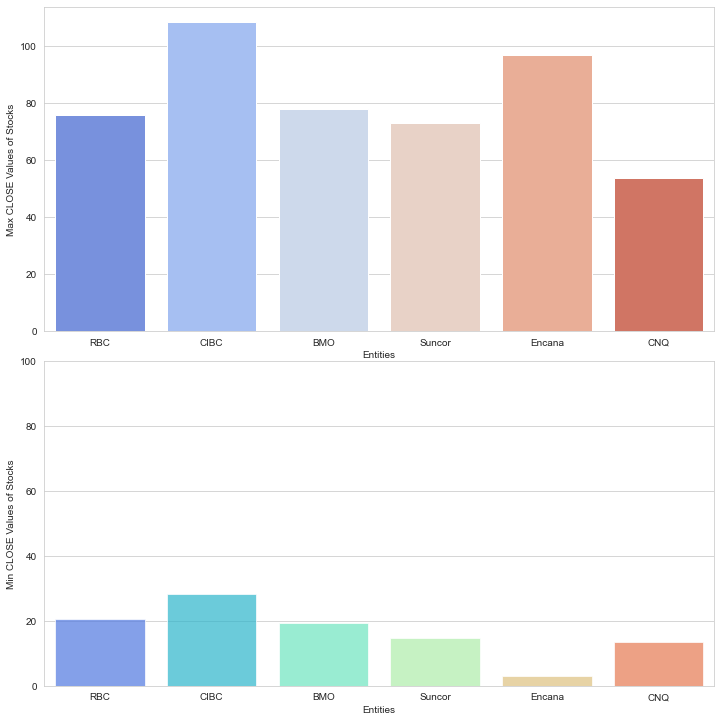

In [13]:
fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (10,10))
plt.tight_layout()
sns.barplot(max_stocks_close.index, max_stocks_close.values, ax = axes[0], palette = 'coolwarm')
axes[0].set_ylabel('Max CLOSE Values of Stocks')
sns.barplot(min_stocks_close.index, min_stocks_close.values, ax = axes[1], alpha = 0.7, palette = 'rainbow')
axes[1].set_ylabel('Min CLOSE Values of Stocks')
axes[1].set_ylim(0, 100)

In [14]:
bo.head()

Entities      RBC                                CIBC                       \
StocksAt     Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entities           ... Encana                                  CNQ         \
StocksAt   Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entities                           
StocksAt      Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

In [15]:
bo['RBC']['Close']

Date
2006-01-03    39.59
2006-01-04    40.34
2006-01-05    39.48
2006-01-06    39.28
2006-01-09    39.00
              ...  
2016-12-23    67.77
2016-12-27    67.90
2016-12-28    67.71
2016-12-29    67.68
2016-12-30    67.71
Name: Close, Length: 2769, dtype: float64

In [16]:
a = ('RBC', 'CIBC', 'BMO', 'Suncor', 'Encana', 'CNQ')

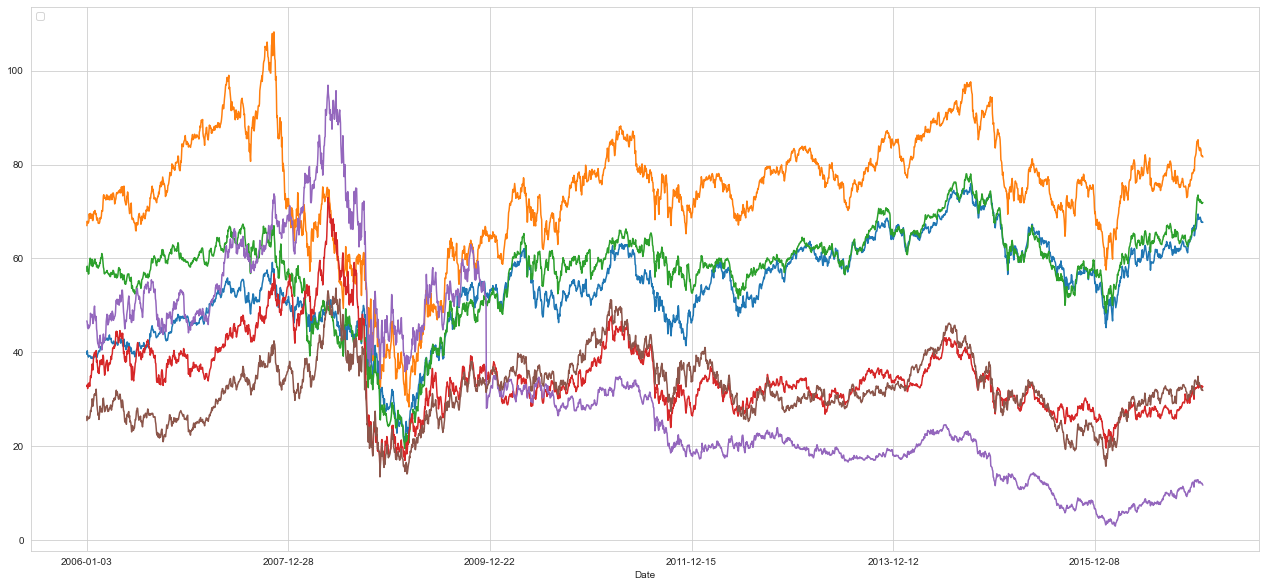

In [17]:
for z in a:
    bo[z]['Close'].plot(figsize = (22, 10), label = z)

line1 = 'RBC'
line2 = 'CIBC'
line3 = 'BMO'
line4 = 'Suncor'
line5 = 'Encana'
line6 = 'CNQ'
plt.legend((line1, line2, line3, line4, line5, line6), ('RBC', 'CIBC', 'BMO', 'Suncor', 'Encana', 'CNQ'), loc = 2)

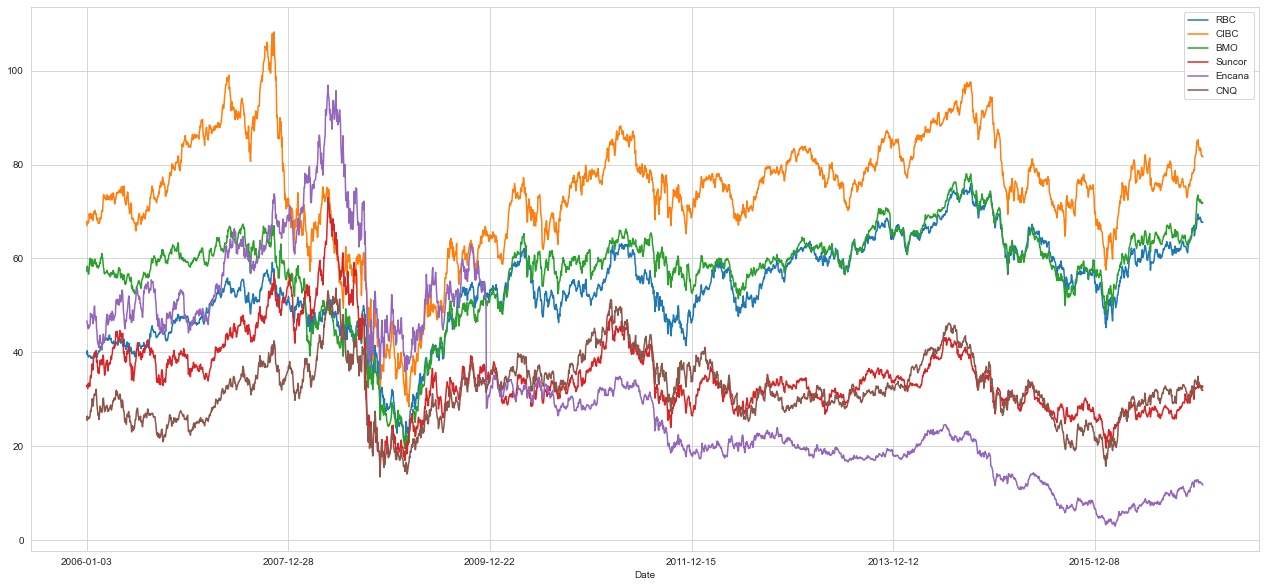

In [18]:
for z in a:
    bo[z]['Close'].plot(figsize = (22, 10), label = z)
    plt.legend()

In [19]:
bo.xs(key = 'Close', axis=1, level='StocksAt').iplot()

# Checking the head of wti.

In [20]:
wti.head()  # Earlier here column name was 'Value'

Value
Date             
2016-12-30  53.75
2016-12-29  53.80
2016-12-28  54.01
2016-12-27  52.82
2016-12-23  52.01

# Setting wti column 'Value' -> 'Price vs Barrel'.

In [21]:
wti.columns = ['Price vs Barrel']
wti.head()

Price vs Barrel
Date                       
2016-12-30            53.75
2016-12-29            53.80
2016-12-28            54.01
2016-12-27            52.82
2016-12-23            52.01

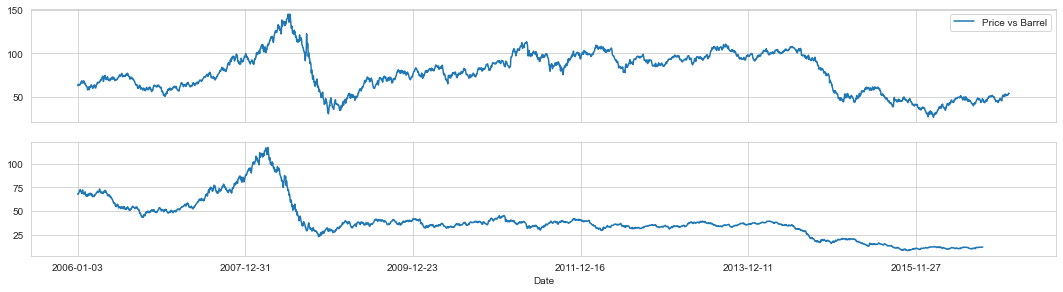

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,4), sharex = True)
plt.tight_layout()
#wti['Price vs Barrel'].plot(ax = axes[0])
uso['Close'].plot(ax = axes[1])     # We can see wti date columns are reversed to that of uso, 
wti[::-1].plot(ax = axes[0])

# Creating a new dataframe called Profit.
Calculating profit/return on investment for each entity in our dataframe and showing into new dataframe Profit.

In [23]:
profit = pd.DataFrame()

for z in a:
    profit[z + ' Percent_Change'] = bo[z]['Close'].pct_change()

In [24]:
profit

RBC Percent_Change  CIBC Percent_Change  BMO Percent_Change  \
Date                                                                      
2006-01-03                 NaN                  NaN                 NaN   
2006-01-04            0.018944             0.014333            0.019389   
2006-01-05           -0.021319            -0.006918           -0.014736   
2006-01-06           -0.005066             0.004002           -0.005913   
2006-01-09           -0.007128            -0.001624           -0.008572   
...                        ...                  ...                 ...   
2016-12-23           -0.006451            -0.015028           -0.004573   
2016-12-27            0.001918             0.000488            0.001670   
2016-12-28           -0.002798            -0.002684           -0.003613   
2016-12-29           -0.000443             0.000734            0.001674   
2016-12-30            0.000443            -0.002567            0.001392   

            Suncor Percent_Change  Encana Percent_Change  CNQ Percent_Change  
Date                                                                          
2006-01-03                    NaN                    NaN                 NaN  
2006-01-04               0.010073              -0.008565            0.037677  
2006-01-05              -0.023874              -0.023326           -0.027231  
2006-01-06               0.031269               0.014153            0.010886  
2006-01-09              -0.012309              -0.017662            0.006154  
...                           ...                    ...                 ...  
2016-12-23              -0.004253              -0.009009           -0.008631  
2016-12-27               0.003661               0.003306           -0.005286  
2016-12-28              -0.011854              -0.003295            0.006877  
2016-12-29               0.007998              -0.022314           -0.007451  
2016-12-30              -0.002441              -0.007608           -0.002815  

[2769 rows x 6 columns]

# Creating a pairplot using seaborn of profit dataframe.

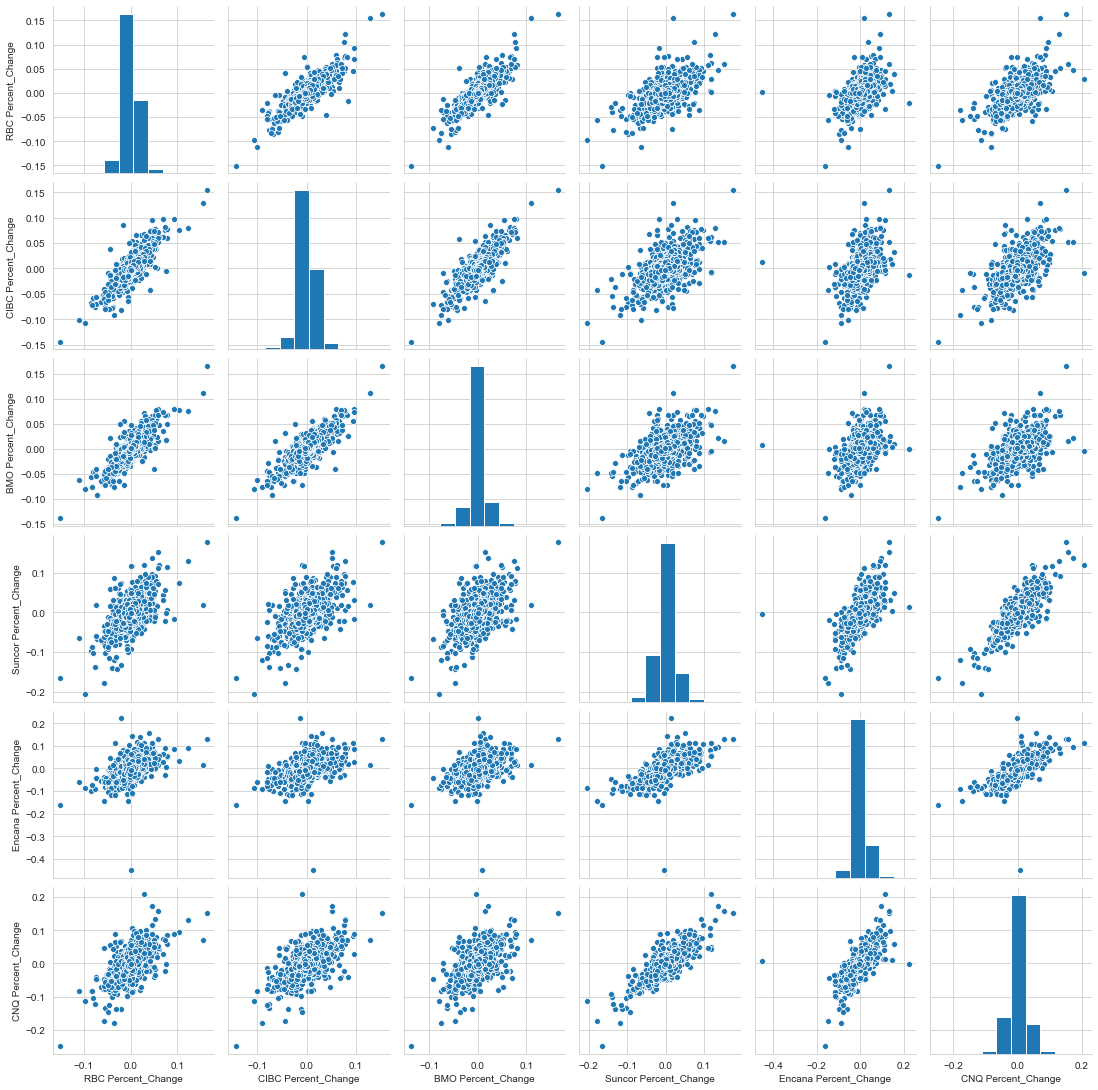

In [25]:
sns.pairplot(data = profit)

#
~ Best Single Day Gain of each bank or oil company.
~ Worst Single Day Gain of each bank or oil company.

In [26]:
profit.idxmax()

RBC Percent_Change       2008-10-13
CIBC Percent_Change      2008-10-13
BMO Percent_Change       2008-10-13
Suncor Percent_Change    2008-10-13
Encana Percent_Change    2016-02-24
CNQ Percent_Change       2008-11-21
dtype: object

In [27]:
profit.idxmin()

RBC Percent_Change       2008-11-20
CIBC Percent_Change      2008-11-20
BMO Percent_Change       2008-11-20
Suncor Percent_Change    2009-01-20
Encana Percent_Change    2009-12-09
CNQ Percent_Change       2008-11-20
dtype: object

# Which stock is the riskiest over the entire time period?

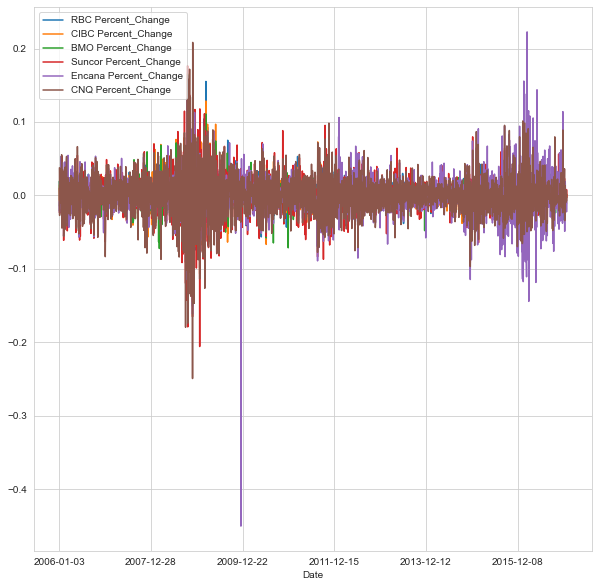

In [28]:
b = ('RBC Percent_Change', 'CIBC Percent_Change', 'BMO Percent_Change', 'Suncor Percent_Change', 'Encana Percent_Change', 'CNQ Percent_Change')
for z in b:
    profit[z].plot(figsize = (10, 10), label = z)
    plt.legend()

In [29]:
profit.std()

RBC Percent_Change       0.017404
CIBC Percent_Change      0.018244
BMO Percent_Change       0.016974
Suncor Percent_Change    0.026503
Encana Percent_Change    0.029234
CNQ Percent_Change       0.028247
dtype: float64

# Answer - 
Since Encana has the highest Standard Deviation it can be classified as the most riskiest stock. It is observed that it has achieved the highest percent change value from last day but has also achieved the lowest which makes it as the most riskiest stock.

# Which stock was the more riskiest in 2008 and how it changes in 2016?

In [30]:
profit.loc['2008-01-01' : '2008-12-30'].std()

RBC Percent_Change       0.031713
CIBC Percent_Change      0.036268
BMO Percent_Change       0.031502
Suncor Percent_Change    0.049237
Encana Percent_Change    0.040976
CNQ Percent_Change       0.054149
dtype: float64

In [31]:
profit.loc['2016-01-01' : '2016-12-30'].std()

RBC Percent_Change       0.013636
CIBC Percent_Change      0.013055
BMO Percent_Change       0.012131
Suncor Percent_Change    0.020997
Encana Percent_Change    0.046978
CNQ Percent_Change       0.027645
dtype: float64

# Answer - 
CNQ was more riskiest in 2008 but it changed to bettter in 2016 and in 2016 Encana was more riskiest. Looking Percent_Change of Encana in 2008 it states Encana was riskiest at that time too.

# Distplot using seaborn of Encana and CNQ percent change in 2008.

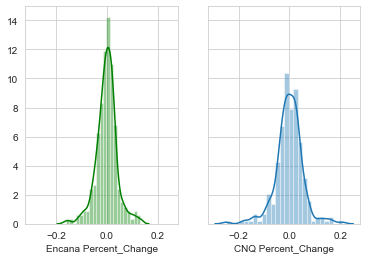

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, sharey = True)
sns.distplot(a = profit['Encana Percent_Change'].loc['2008-01-01' : '2008-12-30'], ax = axes[0], color = 'green')
sns.distplot(a = profit['CNQ Percent_Change'].loc['2008-01-01' : '2008-12-30'], ax = axes[1])

# Moving Averages of Encana and CNQ in 2008.


Plotting 30 day average against the Close Price for Encana and CNQ stocks in 2008.

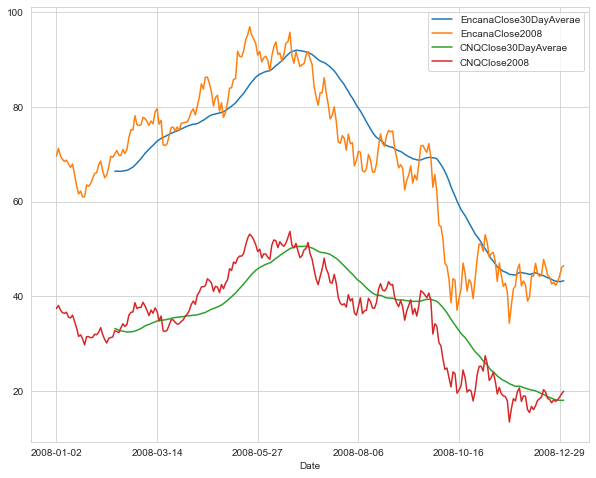

In [33]:
plt.figure(figsize = (10,8))
# Using pandas rolling function for 30 datapoints.
encana['Close'].loc['2008-01-01' : '2008-12-31'].rolling(window = 30).mean().plot(
    label = 'EncanaClose30DayAverae')   # Individual dataframe encana is used.

encana['Close'].loc['2008-01-01' : '2008-12-31'].plot(label = 'EncanaClose2008')      # Encana datarme for 2008.

cnq['Close'].loc['2008-01-01' : '2008-12-31'].rolling(window = 30).mean().plot(
    label = 'CNQClose30DayAverae')

cnq['Close'].loc['2008-01-01' : '2008-12-31'].plot(label = 'CNQClose2008')
plt.legend()

# Heatmap for correlation of Stock Close Price.

Creating a pivot table first.

In [34]:
heatmap = bo.xs(key = 'Close', axis = 1, level = 'StocksAt').corr()

In [35]:
heatmap

Entities       RBC      CIBC       BMO    Suncor    Encana       CNQ
Entities                                                            
RBC       1.000000  0.743279  0.849328  0.052802 -0.539744  0.444742
CIBC      0.743279  1.000000  0.917096  0.341356 -0.208048  0.438231
BMO       0.849328  0.917096  1.000000  0.171421 -0.421232  0.408481
Suncor    0.052802  0.341356  0.171421  1.000000  0.718651  0.672301
Encana   -0.539744 -0.208048 -0.421232  0.718651  1.000000  0.217881
CNQ       0.444742  0.438231  0.408481  0.672301  0.217881  1.000000

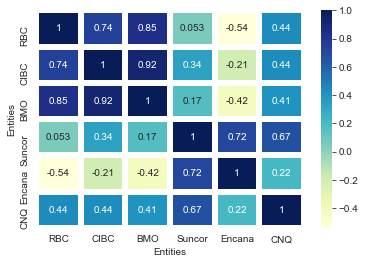

In [36]:
sns.heatmap(heatmap, annot = True, cmap = 'YlGnBu', linewidth = 5, cbar = True)

# Plotting clustermap.

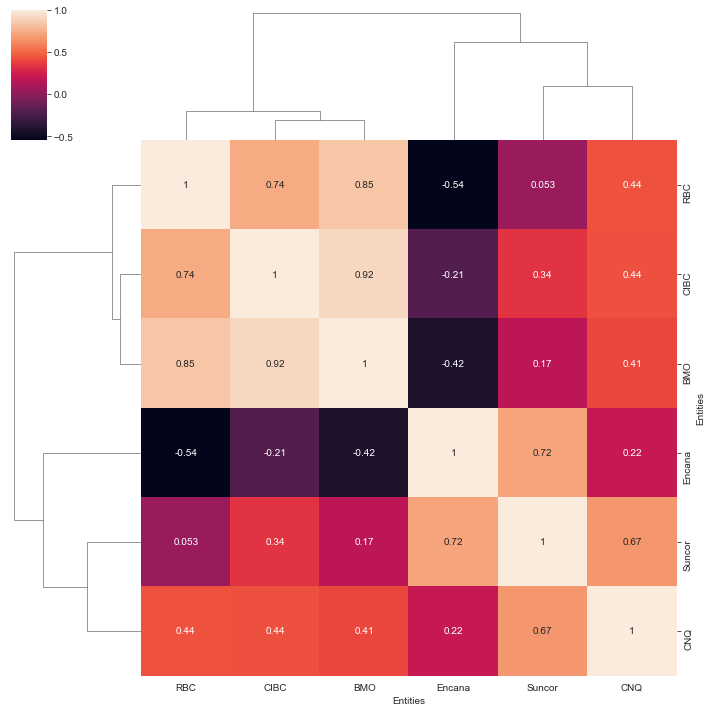

In [37]:
sns.clustermap(heatmap, annot = True)

# Plotting Candle Plot for Encana stock for 2008.

In [38]:
encana[['Open', 'High', 'Low', 'Close']].loc['2008-01-01' : '2008-12-01'].iplot(kind = 'candle')

# Technical Analysis - SMA of 10, 20, 50 plot of Encana for 2015.

In [43]:
encana['Close'].loc['2015-01-01' : '2015-12-31'].ta_plot(study = 'sma', periods = [10, 20, 50])

# Technical Analysis - Bollinger Bands for the year 2015.

In [44]:
encana['Close'].loc['2015-01-01' : '2015-12-31'].ta_plot(study = 'boll')